Name: Deepak Dwivedi
Student ID : 11920001


In [183]:
#importing library
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from math import log

import sklearn.naive_bayes as sn
import sklearn.preprocessing as sp
import sklearn.tree as st

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics


In [2]:
# setting up environment
print(os.getcwd())
os.chdir("C:\\Users\\Dwiv2\\OneDrive\\Desktop\\Assignment\\Supervised learning\\term4")
print("after",os.getcwd())




C:\Users\Dwiv2\Downloads
after C:\Users\Dwiv2\OneDrive\Desktop\Assignment\Supervised learning\term4


#Question #1



In [3]:
iris=pd.read_csv('Iris.csv')

#Understanding the data 

print("View top 5 record",iris.head())
print("variable and thier data type",iris.info())
print("5 point summary ",iris.describe())

View top 5 record    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
variable and thier data type None
5 point summary                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
co

<Figure size 648x360 with 0 Axes>

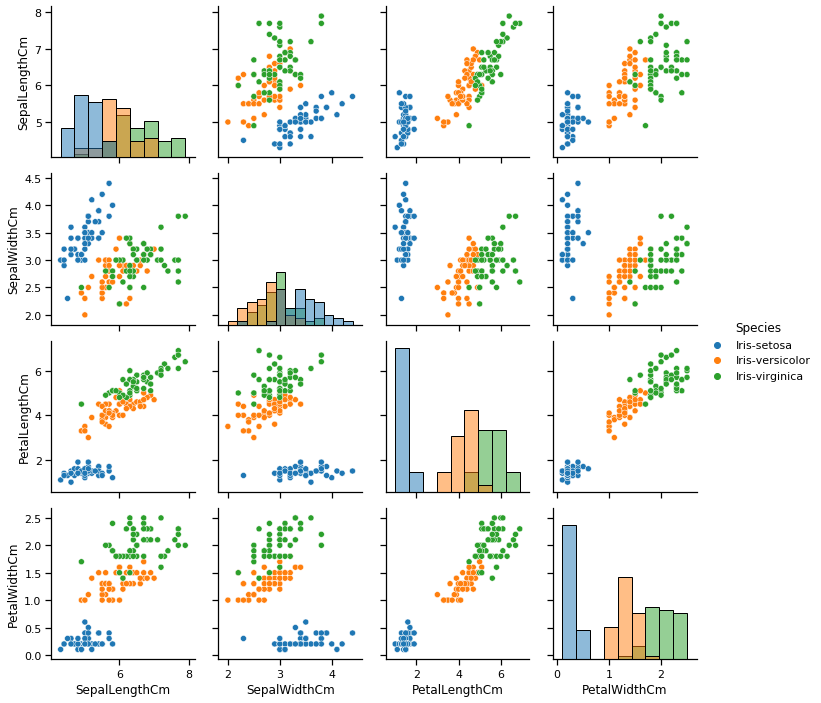

In [4]:
#Plotting the data 

sns.set_context("notebook", font_scale=1)
plt.figure(figsize=(9,5))

gph=sns.PairGrid(data=iris, vars=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'], hue='Species')
gph.map_diag(sns.histplot)
gph.map_offdiag(sns.scatterplot)
gph.add_legend()

In [12]:
#As per baove scatter plot, looks Versicolor and virginica is similar 
# doing further analysis.

class4=iris[iris['Species']!='Iris-setosa']
class4.Species='class4'
iris2=iris.append(class4, ignore_index = True)
y=iris2.Species
x=iris2.copy()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=90)

#Meta class vs setos
x_train2=x_train[x_train['Species'].isin(['Iris-setosa', 'class4'])]

print(x_train2.Species.unique())

['Iris-setosa' 'class4']


In [25]:
y_test.head()

213            class4
131    Iris-virginica
37        Iris-setosa
240            class4
44        Iris-setosa
Name: Species, dtype: object

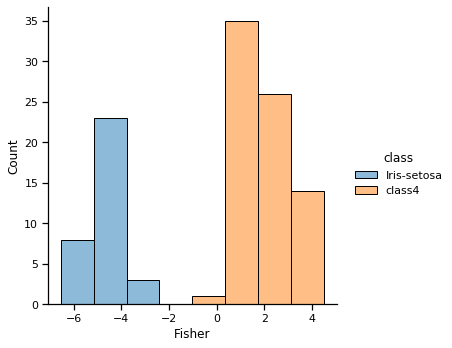

In [26]:
# class 4 vs setosa
lda = LinearDiscriminantAnalysis()

x=x_train2.copy()
x.drop(['Species','Id'],axis=1,inplace=True)
y=x_train2.Species
xlda=lda.fit_transform(x,y)
# creating data frame with distance
dis=pd.DataFrame({'Fisher': xlda[:,0],'class':y})
sns.displot(x='Fisher',hue='class',data=dis)

# as per below distribution, Setosa is completely different from other two.

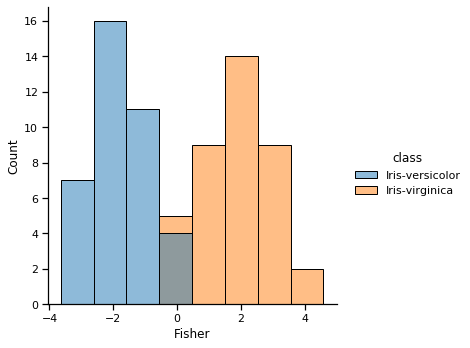

In [27]:
# Versicolor vs  virginica distribution

ldaa = LinearDiscriminantAnalysis()
x_train2a=x_train[x_train['Species'].isin(['Iris-virginica', 'Iris-versicolor'])]

xa=x_train2a.copy()
xa.drop(['Species','Id'],axis=1,inplace=True)
ya=x_train2a.Species
xldaa=ldaa.fit_transform(xa,ya)
# creating distribution
distance=pd.DataFrame({'Fisher': xldaa[:,0],'class':ya})
sns.displot(x='Fisher',hue='class',data=distance)

#Now as per below score , almost two are clearly distinct 

['Iris-virginica' 'Iris-setosa' 'Iris-versicolor']


"'\n\n\ny=xa.Species\nfit1=lda.fit_transform(xf,yf)\nfit2=ldaa.fit_transform(xf,yf)\ndistance_complete=pd.DataFrame({'Fisher1': fit1[:,0],'Fisher2': fit2[:,0],'class':y})\n\nsns.scatterplot(x='Fisher1',y='Fisher2',hue='class',data=distance_complete)"

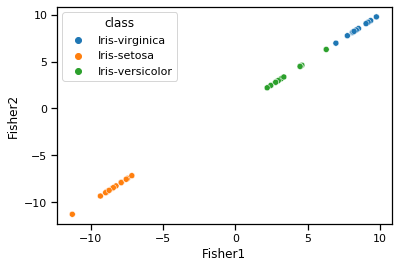

In [45]:

xa=x_test[x_test['Species']!='class4']
x_testc=xa.copy()
x_testc.drop(['Species','Id'],axis=1,inplace=True)
y=xa.Species

fit1=lda.fit_transform(x_testc,y)
fit2=ldaa.fit_transform(x_testc,y)

distance_complete=pd.DataFrame({'Fisher1': fit1[:,0],'Fisher2': fit2[:,0],'class':y})
sns.scatterplot(x='Fisher1',y='Fisher2',hue='class',data=distance_complete)

print(xa.Species.unique())
# the three classes  has clear distinguish


Question # 2

In [48]:
m=pd.read_csv('mushrooms.csv')

#understanding the data 

print("View top 5 record",m.head())
print("variable and thier data type",m.info())
print("5 point summary ",m.describe())
print("# of unique class",m['class'].unique())

View top 5 record   class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p     

In [69]:
# data prep

col=m.columns.to_list()
col.remove("class")
output=pd.DataFrame(columns=['Feature_name','Accuracy','GINI index','1-Entropy','Log_k'])

In [77]:
for i in col:
    j=m[i].unique()
    acc=0
    gin=0
    entr=0
    for k in j:
        p=m[m[i]==k]
        p2=len(p)/len(m)
        l=len(p)
        count=len(p[p['class']=='e'])
        pr=count/l
        if(pr>.5):
            acc+=p2*pr
            gin+=p2*(pr*pr + (1-pr)*(1-pr))
            entr+=p2*(-pr*log(pr,2))
        else:
            acc+=p2*(1-pr)
            gin+=p2*(pr*pr + (1-pr)*(1-pr))
            entr+=p2*(-(1-pr)*log((1-pr),2))
    output=output.append({'Feature_name':i,'Accuracy':acc,'GINI index':gin,'1-Entropy':(1-entr),'Log_k':log(len(j))}, ignore_index=True)

        
        
    

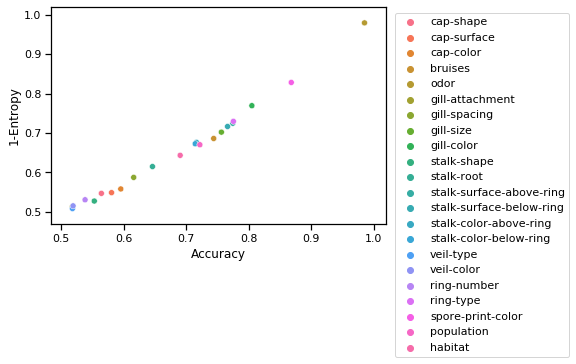

In [80]:
sns.scatterplot(data=output,x='Accuracy',y='1-Entropy',hue='Feature_name')
plt.legend(bbox_to_anchor=(1.01, 1))

Question # 3


In [113]:
m=pd.read_csv('mushrooms.csv')

encod=sp.LabelEncoder()

In [114]:
for col in m.columns:
    m[col] = encod.fit_transform(m[col])

y=m['class']
m.drop(['class','veil-type'],inplace=True,axis=1)

x_train, x_test, y_train, y_test = train_test_split(m,y,test_size=0.3, random_state=90)

In [120]:
comp_data=pd.DataFrame(columns=['Alpha','Train_Accuracy','Test_Accuracy'])
for i in range(0,100):
    model=sn.CategoricalNB(alpha=i)
    model.fit(x_train,y_train)
    train_acc=model.score(x_train,y_train)
    test_acc=model.score(x_test,y_test)
    comp_data=comp_data.append({'Alpha':i,'Train_Accuracy':train_acc,'Test_Accuracy':test_acc}, ignore_index=True)

D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


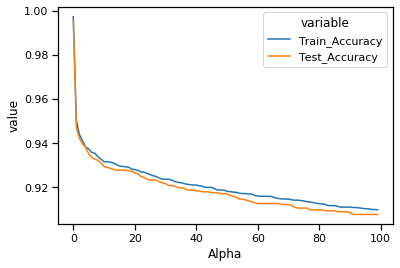

In [121]:
#Plotting elbow graph
sns.lineplot(x='Alpha', y='value', hue='variable', data=pd.melt(comp_data, ['Alpha']))

In [126]:
comp_data2=pd.DataFrame(columns=['SizeThreshold','Train_Accuracy','Test_Accuracy'])
for i in range(4,68,4):
    model = st.DecisionTreeClassifier(criterion = 'gini',min_samples_leaf=i)
    model.fit(x_train,y_train)
    train_acc=model.score(x_train,y_train)
    test_acc=model.score(x_test,y_test)
    comp_data2=comp_data2.append({'SizeThreshold':i,'Train_Accuracy':train_acc,'Test_Accuracy':test_acc}, ignore_index=True)

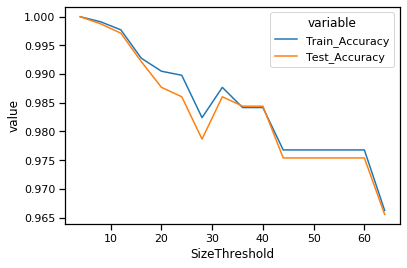

In [127]:
sns.lineplot(x='SizeThreshold', y='value', hue='variable', data=pd.melt(comp_data2, ['SizeThreshold']))

Question 4

In [128]:
D0=pd.read_csv('mnist_train.csv')

In [131]:
# data understanding
print("sample view",D0.head())
print("5 point summary",D0.describe())


sample view    label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
5 point summary               label      1x1      1x2      1x3      1x4      1x5      1x6  \
count  60000.000000  60000.0  60000.0  60000.0  60000.

In [134]:
# PCA projection

pca = PCA(n_components=9)

D1=pd.DataFrame(pca.fit_transform(D0.drop(['label'],axis=1)))
print(D1.head())

             0           1           2           3           4           5  \
0   123.932597 -312.674138  -24.513854 -555.756025  -27.294272 -232.478267   
1  1011.718420 -294.857031  596.339923 -460.767440 -827.276544 -181.960914   
2   -51.849618  392.173329 -188.508760  521.013539 -306.672666   -1.846831   
3  -799.127019 -607.197079  273.652381  105.881518   -1.845697  699.627754   
4  -382.754952  730.542980   16.354396 -241.696037   98.165595   43.221401   

            6           7           8  
0  233.943718  159.627213 -363.435660  
1  -45.308322 -105.474367   40.767780  
2 -859.070718  368.602609 -114.637770  
3 -473.857033  -67.568253  302.872097  
4  -91.641547 -405.447275  225.431077  


In [135]:
# Fisher Projection

lda9 = LinearDiscriminantAnalysis(n_components=9)
D2=pd.DataFrame(lda9.fit_transform(D0.drop(['label'],axis=1),D0['label']))
print(D2.head())

          0         1         2         3         4         5         6  \
0 -0.904599 -0.638478 -1.755056 -0.238329  0.642297  4.028295  0.818957   
1 -2.899556 -3.313297 -2.865910 -0.136275 -3.032717 -0.486177  0.417481   
2  1.969728  0.067838  1.084279  0.368646  0.914848 -1.498658  2.092084   
3  0.351872  4.013415 -0.220338  0.527315 -1.578539 -0.312613 -0.074737   
4  3.210789 -1.447357  0.639718  0.384037 -1.199693 -1.445513 -0.682200   

          7         8  
0  1.679993 -0.784362  
1 -0.912528 -0.194378  
2  1.693724  2.938579  
3  0.572640  0.779048  
4 -2.003583 -1.828191  


In [171]:
# Attaching labels to the projection
D1['label']=D0['label']
D2['label']=D0['label']

In [144]:
#first baysean classifier
unq=D1.label.unique()
#cl1=[[]]
#i=0
for i in unq:
    mean=np.mean(D1[D1['label']==i].drop(['label'],axis=1))
    #Full covariance matrix
    cov_full=D1[D1['label']==i].drop(['label'],axis=1).cov()
    #Only diagonal co-variance matrix
    cov_diag=cov_full.copy()
    for i in range(0,9):
        for j in range(0,9):
            if (i!=j):
                cov_diag.iloc[i,j]=0


Full Co-varinace matrix                0             1              2              3              4  \
0  142970.871625  14018.031670  -28700.200001  -12277.609206   62740.742637   
1   14018.031670  79016.634222   -7344.665434     710.579114     658.266017   
2  -28700.200001  -7344.665434  235516.410743  -78622.181207  -30485.440457   
3  -12277.609206    710.579114  -78622.181207  108644.613255  -34905.000110   
4   62740.742637    658.266017  -30485.440457  -34905.000110  101807.613069   
5   19492.855008  12761.336314   23730.982562  -13942.980214   12551.133130   
6   -9802.286478  15237.967812  -19812.295949   -1796.767440   25894.095477   
7   -2067.773603 -25545.471879  -18749.941642   19844.779978  -11363.475640   
8   17932.174826   7662.733176  -25729.209198    7555.578749    3393.511175   

              5             6             7             8  
0  19492.855008  -9802.286478  -2067.773603  17932.174826  
1  12761.336314  15237.967812 -25545.471879   7662.733176  
2  23

In [145]:
# full co-variance  matrix
cov_full

,0,1,2,3,4,5,6,7,8
0,142970.871625,14018.031670,-28700.200001,-12277.609206,62740.742637,19492.855008,-9802.286478,-2067.773603,17932.174826
1,14018.031670,79016.634222,-7344.665434,710.579114,658.266017,12761.336314,15237.967812,-25545.471879,7662.733176
2,-28700.200001,-7344.665434,235516.410743,-78622.181207,-30485.440457,23730.982562,-19812.295949,-18749.941642,-25729.209198
3,-12277.609206,710.579114,-78622.181207,108644.613255,-34905.000110,-13942.980214,-1796.767440,19844.779978,7555.578749
4,62740.742637,658.266017,-30485.440457,-34905.000110,101807.613069,12551.133130,25894.095477,-11363.475640,3393.511175
5,19492.855008,12761.336314,23730.982562,-13942.980214,12551.133130,66044.405700,-9921.465468,-13750.658100,412.910229
6,-9802.286478,15237.967812,-19812.295949,-1796.767440,25894.095477,-9921.465468,75949.635282,-2166.392704,17648.278269
7,-2067.773603,-25545.471879,-18749.941642,19844.779978,-11363.475640,-13750.658100,-2166.392704,57336.079722,14964.624950
8,17932.174826,7662.733176,-25729.209198,7555.578749,3393.511175,412.910229,17648.278269,14964.624950,92823.701466


In [146]:
# diagonal co-variance  matrix

cov_diag

,0,1,2,3,4,5,6,7,8
0,142970.871625,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
1,0.000000,79016.634222,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
2,0.000000,0.000000,235516.410743,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,108644.613255,0.000000,0.0000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,101807.613069,0.0000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,66044.4057,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,75949.635282,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,57336.079722,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,92823.701466


Question #5


In [162]:
# importing training and test data 
train=pd.read_csv("mnist_train.csv")
train_x=train.copy()

test=pd.read_csv("mnist_test.csv")
test_x=test.copy()


In [173]:
# preparing training and test data 
D1_train_x=D1.copy()
D2_train_x=D2.copy()

D1_train_x.drop(['label'],axis=1,inplace=True)
D1_train_y=D1.label

D2_train_x.drop(['label'],axis=1,inplace=True)
D2_train_y=D2.label


In [178]:
D1_x_traina, D1_x_testa, D1_y_traina, D1_y_testa = train_test_split(D1_train_x,D1_train_y,test_size=0.3, random_state=90)
D2_x_traina, D2_x_testa, D2_y_traina, D2_y_testa = train_test_split(D2_train_x,D2_train_x,test_size=0.3, random_state=90)


In [189]:
# KNN fitting for D1

pred_D1=pd.DataFrame(columns=['K','Predicted','seq'])


for i in range(1,19,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(D1_x_traina, D1_y_traina)
    for j in range(len(D1_y_testa)):
        y1_pred = knn.predict(D1_x_testa[j])
        pred_D1=pred_D1.append({'seq':j,'K':i,'Predicted':y1_pred}, ignore_index=True)
    #print("Accuracy:",metrics.accuracy_score(D1_y_testa, pred))
    


KeyboardInterrupt: 

In [186]:
# KNN fitting for D2
pred_D2=pd.DataFrame(columns=['K','Predicted','seq'])

#fitting for D1
for i in range(1,19,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(D2_x_traina, D2_y_traina)
    for j in range(len(D2_y_testa)):
        y1_pred = knn.predict(D2_x_testa)
        pred_D2=pred_D2.append({'seq':j,'K':i,'Predicted':y1_pred}, ignore_index=True)

,K,Predicted
0,1,"[6, 1, 0, 2, 9, 6, 8, 9, 3, 0, 7, 3, 3, 8, 4, ..."


In [190]:
pred.head()

,K,Predicted
0,1,"[6, 1, 0, 2, 9, 6, 8, 9, 3, 0, 7, 3, 3, 8, 4, ..."
1,1,"[6, 1, 0, 2, 9, 6, 8, 9, 3, 0, 7, 3, 3, 8, 4, ..."
2,1,"[6, 1, 0, 2, 9, 6, 8, 9, 3, 0, 7, 3, 3, 8, 4, ..."
3,1,"[6, 1, 0, 2, 9, 6, 8, 9, 3, 0, 7, 3, 3, 8, 4, ..."
4,1,"[6, 1, 0, 2, 9, 6, 8, 9, 3, 0, 7, 3, 3, 8, 4, ..."


In [155]:
train_x=train.drop('label')

KeyError: "['label'] not found in axis"

In [159]:
train_x.drop(['label'],axis=1,inplace=True)

AttributeError: 'function' object has no attribute 'drop'